# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import nltk
nltk.download('stopwords')
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head(n=5)

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [4]:
print('Number of rows and columns in the messages file are: {} and {}'.format(messages.shape[0],messages.shape[1]))
print('Number of rows and columns in the categories file are: {} and {}'.format(categories.shape[0],categories.shape[1]))

Number of rows and columns in the messages file are: 26248 and 4
Number of rows and columns in the categories file are: 26248 and 2


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [5]:
# merge datasets
df = messages.merge(categories, on='id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [6]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(pat=';', expand=True)
categories.head().transpose()

,0,1,2,3,4
0,related-1,related-1,related-1,related-1,related-1
1,request-0,request-0,request-0,request-1,request-0
2,offer-0,offer-0,offer-0,offer-0,offer-0
3,aid_related-0,aid_related-1,aid_related-0,aid_related-1,aid_related-0
4,medical_help-0,medical_help-0,medical_help-0,medical_help-0,medical_help-0
5,medical_products-0,medical_products-0,medical_products-0,medical_products-1,medical_products-0
6,search_and_rescue-0,search_and_rescue-0,search_and_rescue-0,search_and_rescue-0,search_and_rescue-0
7,security-0,security-0,security-0,security-0,security-0
8,military-0,military-0,military-0,military-0,military-0
9,child_alone-0,child_alone-0,child_alone-0,child_alone-0,child_alone-0


In [7]:
categories.head(n=1)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [8]:
# def create_columns():
#     column_names = []
#     for category_name in row.values[0]:
#         column_names.append(category_name.split('-')[0])
    
#     return column_names
        

In [9]:
# select the first row of the categories dataframe
firstrow = categories.iloc[0,:]


# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
#category_colnames = row.apply(lambda row: create_columns(), axis=1)[0]
category_colnames = firstrow.apply(lambda x:x[:-2])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [10]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [11]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].astype(str).str[-1:]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [12]:
# drop the original categories column from `df`
df.drop(['categories'], axis=1, inplace=True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [13]:
# concatenate the original dataframe with the new `categories` dataframevpd.concat([df, categories], join='inner', axis=1)
df = pd.concat([df,categories], join='inner', axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [14]:
# check number of duplicates
print('Duplicate No.: {}'.format(sum(df.duplicated())))

Duplicate No.: 170


In [15]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
# check number of duplicates
print('Duplicate No. after removal: {}'.format(sum(df.duplicated())))

Duplicate No. after removal: 0


## Remove Links

In [30]:
import re
df['message'] = df['message'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'url_placeholder')
df[df.message == 'url_placeholder']

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
7403,8283,url_placeholder,http : //wap. sina. comhttp : //wap. sina. com,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15820,18522,url_placeholder,NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Drop url links
df = df[df.message != 'url_placeholder']
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is Hurricane,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 8090 destroyed Only Hospita...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,says west side Haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information National Palace,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm sacred heart jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,Please need tents water We Silo Thank,Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,I would like receive messages thank,Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I CroixdesBouquets We health issues They worke...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


## Remove Puncuation

In [18]:
df['message'] = df['message'].str.replace('[^\w\s]','')

## Remove Stopwords

In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english")
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df['message']

0          Weather update cold front Cuba could pass Haiti
1                                             Is Hurricane
2                                     Looking someone name
3        UN reports Leogane 8090 destroyed Only Hospita...
4          says west side Haiti rest country today tonight
5                              Information National Palace
6                                 Storm sacred heart jesus
7                    Please need tents water We Silo Thank
8                      I would like receive messages thank
9        I CroixdesBouquets We health issues They worke...
10               Theres nothing eat water starving thirsty
11         I Petionville I need information regarding 4636
12       I Thomassin number 32 area named Pyron I would...
13            Lets together need food Delma 75 didine area
14       More information 4636 number order participate...
15       A Comitee Delmas 19 Rue street Janvier Impasse...
16       We need food water Klecin 12 We dying hunger I.

## 7. Text EDA

## Plot top-n non stopwords

In [21]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    #stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    barplot = sns.barplot(x=y,y=x)
    barplot.set_ylim(15, 1)

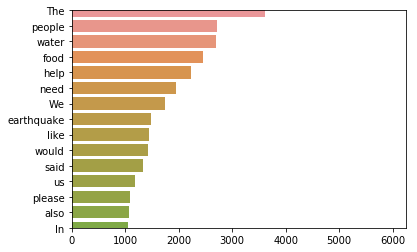

In [22]:
plot_top_non_stopwords_barchart(df['message'])

## Get top-ngrams

In [23]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

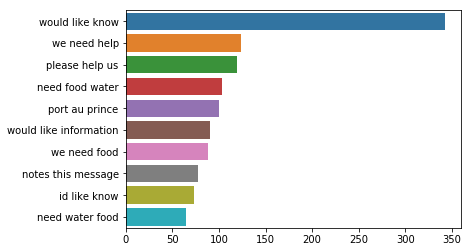

In [24]:
plot_top_ngrams_barchart(df['message'],3)

## Unknown Words

In [25]:
# words = df['message'].str.lower().values.tolist()
# df['clean_text'] = df.message.apply(lambda x: ' '.join([i for i in x.split(' ') if not (i.startswith('@') or i.startswith('#'))]))
# df['clean_text'] = df.message.str.lower().str.replace('[^a-zA]', ' ')
# non_list = {}
# for sent in tqdm(df.clean_text.str.split().values):
#   for token in sent:
#     if token not in words:
#       non_list[token] = 1 if token not in non_list else non_list[token]+1

# pd.Series(non_list).sort_values(ascending=False).head(30)

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [27]:
import os
db_filepath = "disasterResponse_db.db"
engine = create_engine(f'sqlite:///{db_filepath}')
table_name = os.path.basename(db_filepath).replace(".db","") + "_table"
df.to_sql(table_name, engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.